In [1]:
import json
import tensorflow as tf
import csv
import random
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers

print (tf.__version__)


2.2.0


In [2]:
from google.colab import files
uploaded = files.upload()
# Uploaded files belong to the dataset at -> https://www.kaggle.com/praveengovi/emotions-dataset-for-nlp


Saving test.txt to test.txt
Saving train.txt to train.txt
Saving val.txt to val.txt


In [3]:
train = open('train.txt', 'r')
train_data = train.read().split('\n')
test = open('test.txt', 'r')
test_data = test.read().split('\n')
val = open('val.txt', 'r')
val_data = val.read().split('\n')
#print(train_data)
#print(test_data)
#print(val_data)

In [4]:
# Initializing required parameters
embedding_dim = 100
max_length = 50
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [5]:
train_sentences = []
train_labels = []
test_sentences = []
test_labels = []

train_list = []
test_list = []
val_list = []
for line in train_data:
  train_list.append(line.split(';'))

for line in test_data:
  test_list.append(line.split(';'))

# for line in val_data:
#   val_list.append(line.split(';'))

#print (train_list)
for i in range(len(train_list)-1): # Going through each sentence
  sentence = train_list[i][0] # Storing sentence
  label = train_list[i][1] # Storing emotion associated with sentence
  train_sentences.append(sentence)
  train_labels.append(label)

for i in range(len(test_list)-1): # Going through each sentence
  sentence = test_list[i][0] # Storing sentence
  label = test_list[i][1] # Storing emotion associated with sentence
  test_sentences.append(sentence)
  test_labels.append(label)
  
#print (train_labels)
#print (test_labels)


In [6]:
# Tokenizing words in training set
train_tokenizer = Tokenizer(oov_token=oov_tok)
train_tokenizer.fit_on_texts(train_sentences)
train_word_index = train_tokenizer.word_index
train_vocab_size = len(train_word_index)
train_sequences = train_tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Tokenizing test sentences
test_sequences = train_tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(train_labels)
label_word_index = label_tokenizer.word_index

# Converting to numpy array
train_labels_set = np.array(label_tokenizer.texts_to_sequences(train_labels))
test_labels_set = np.array(label_tokenizer.texts_to_sequences(test_labels))
train_sequences_set = np.array(train_padded)
test_sequences_set = np.array(test_padded)


print (len(train_sequences_set))
print (len(train_labels_set))
print (len(test_sequences_set))
print (len(test_labels_set))
#print (train_word_index)
#print (test_padded)
#print (train_vocab_size)
# print (train_sequences_set)
# print (train_labels_set)
# print (test_sequences_set)
# print (test_labels_set)

16000
16000
2000
2000


In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(train_vocab_size+1, embedding_dim, input_length=max_length),
    tf.keras.layers.GRU(64, activation='tanh'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax'),
])
# Loss function used is sparse categorical as desired output is numbers between 1 and 6 and not one hot encoded vector
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy']) 
model.summary()

num_epochs = 8
history = model.fit(train_sequences_set, train_labels_set, epochs=num_epochs, validation_data=(test_sequences_set, test_labels_set), verbose=2)

print("Training Complete")

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 50, 100)           1521400   
_________________________________________________________________
gru_2 (GRU)                  (None, 64)                31872     
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 7)                 231       
Total params: 1,555,583
Trainable params: 1,555,583
Non-trainable params: 0
_________________________________________________________________
Epoch 1/8
500/500 - 13s - loss: 1.6014 - accuracy: 0.3254 - val_loss: 1.5616 - val_accuracy: 0.3480
Epoch 2/8
500/500 - 13s - loss: 1.4927 - accuracy: 0.3646 - val_loss: 0.7553 - val_accuracy: 0.6905
Epoch 3/8
500/500 - 13s - loss: 0.3162 - a

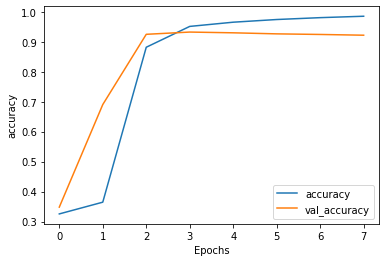

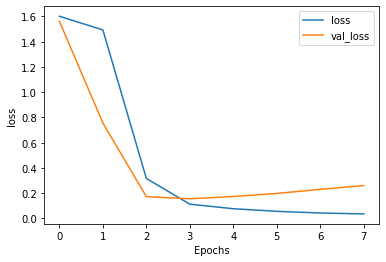

In [13]:
# Plotting accuracy and loss
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [19]:
text = "?I am deeply troubled by the occurence of these events?" # Enter sentence to be predicted here
textlist = text.split('?') 
textlist_final = [] # List to hold sentence 
for i in textlist:
  if i != '':
    textlist_final.append(i)

#print (textlist_final)

token_list = train_tokenizer.texts_to_sequences(textlist_final) # Tokenizing sentence
token_list_padded = pad_sequences(token_list, maxlen=max_length, padding='post') 
#print (token_list_padded)

predicted = np.argmax(model.predict(token_list), axis = -1) # Function to make prediction
print (label_word_index)
print (predicted) 

{'joy': 1, 'sadness': 2, 'anger': 3, 'fear': 4, 'love': 5, 'surprise': 6}
[2]
